In [10]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
oli = fetch_olivetti_faces()

In [5]:
#2D images(64X64) -> 1D(4096)
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

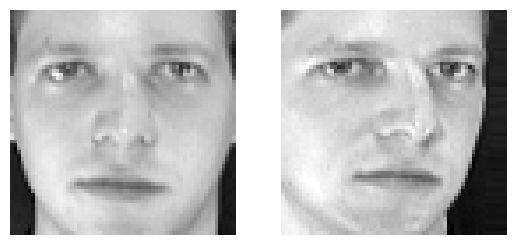

In [8]:
plt.figure()

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(oli.images[i], cmap="gray")
    plt.axis("off")

plt.show()

n_estimators=5 -> Accuracy: 0.6000
n_estimators=50 -> Accuracy: 0.8875
n_estimators=100 -> Accuracy: 0.9375
n_estimators=250 -> Accuracy: 0.9125
n_estimators=500 -> Accuracy: 0.9375
n_estimators=600 -> Accuracy: 0.9375


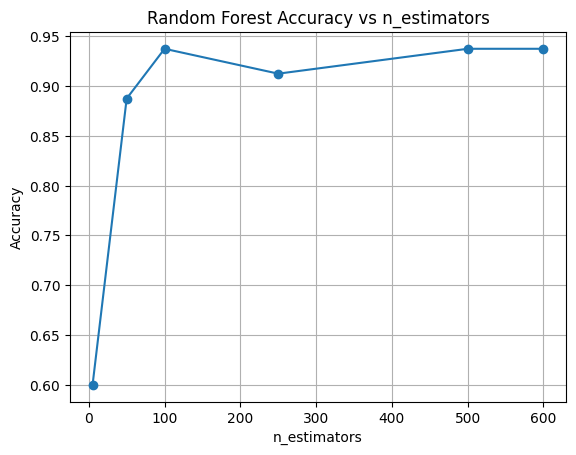

In [22]:
X = oli.data
y = oli.target

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Denenecek estimator sayıları
n_estimators_list = [5, 50, 100, 250,500,600]
accuracies = []

for n in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n} -> Accuracy: {acc:.4f}")

# Grafik çizimi
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title("Random Forest Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
